ผมเคยไปแลกเปลี่ยนที่แคนาดา ช่วงที่มีการเกิดโรคระบาดพอดี และได้สังเกตเห็นได้ชัดเจนว่า วัฒนธรรม และมุมมองของคนแคนาดาที่มีต่อโรคระบาด ต่างกับคนไทยอย่างสิ้นเชิง ผมเลยคิดว่าการที่จะเกิด new cases นอกจากความเจริญของประเทศนั้นๆแล้ว วัฒนธรรมมีผลอย่างยิ่ง ผมจึงเลือกที่จะวิเคราะห์สถิติการเกิด new cases per million แบบรายวัน (เพื่อไม่ต้องกังวลถีงขนาดของประชากร) ของแต่ละเผ่าพันธุ์ เพราะแต่ละเผ่าพันธุ์ จะมีวัฒนธรรมที่ต่าง โดยเลือกมา 3 เผ่าพันธุ์ คือ Mongoloid, Caucasoid และ Negroid โดยเลือกเผ่าพันธุ์ละ 2 ประเทศ คือ ประเทศที่พัฒนาแล้ว และกำลังพัฒนา หรือประเทศที่มีความเจริญต่างกันพอสมควร อ้างอิงจากค่า HDI (Human Development Index) และประเทศที่เลือกจะมีเผ่าพันธุ์นั้นๆ มากกว่า 85-90%


In [ ]:
## ประมวลผลข้อมูล COVID-19 จาก https://github.com/owid/covid-19-data/tree/master/public/data

## ดึงข้อมูลจากไฟล์ https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

!wget https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

--2023-10-23 10:38:40--  https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91879390 (88M) [text/plain]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv 100%[===================>]  87.62M   234MB/s    in 0.4s    

2023-10-23 10:38:40 (234 MB/s) - ‘owid-covid-data.csv’ saved [91879390/91879390]



In [ ]:
# import necessary libs

import matplotlib.pyplot as plt
import pandas as pd

# read csv to dataframe

df = pd.read_csv('owid-covid-data.csv')

####### creating needed lists #############

## iso_code
iso_code = df['iso_code']
list_iso_code = list(iso_code)

## new_cases_per_million
new_cases_per_m = df['new_cases_per_million']
list_new_cases_per_m = list(new_cases_per_m)

## date
df['date'] = pd.to_datetime(df['date'])
date = df['date']
list_date = list(date)



In [ ]:
##### ทำการวิเคราะห์ trend การติดเชื้อของ 3 เผ่าพันธุ์ คือ Mongoloid, Caucasoid และ Negroid
##### โดยวิเคราะห์ เผ่าพันธุ์ละ 2 ประเทศ ประกอบด้วย ประเทศที่พัฒนาแล้ว และกำลังพัฒนา หรือประเทศที่มี HDI (Human Development Index) ห่างกันพอตัว
##### โดยนำกราฟ 2 ประเทศของแต่ละเผ่าพันธุ์มาเฉลี่ยกัน และนำกราฟที่เฉลี่ยแล้วมาวิเคราะห์ว่าการที่เผ่าพันธุ์นั้นแตกต่างกัน มีส่วนเกี่ยวข้องมากน้อยเพียงใด เช่น วัฒนธรรม ความต้านทานต่อโรคภัย ความรู้ความสามารถ ฯลฯ

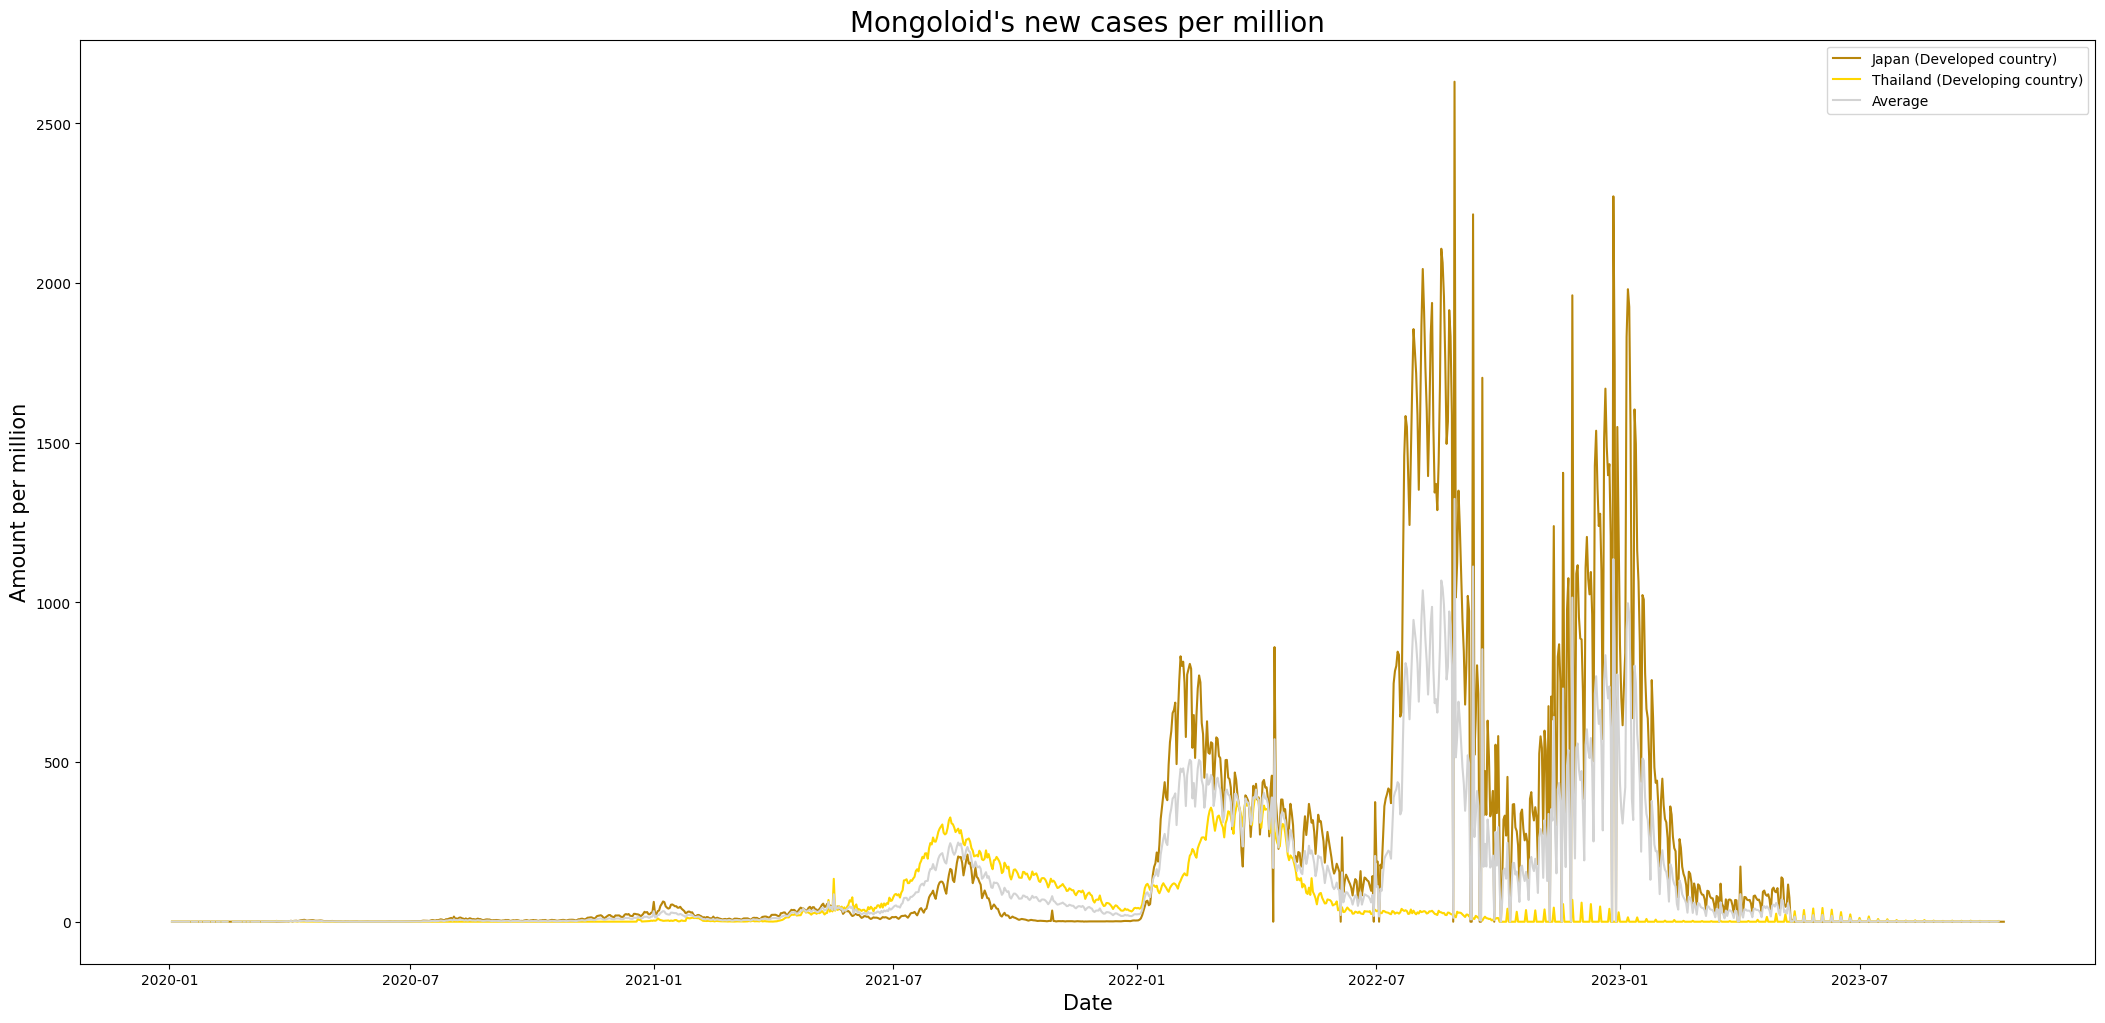

In [ ]:
## ! plotting Mongoloid's (Asian) graph ! ##

# ดึงข้อมูลสองประเทศ คือ JAPAN และ THAILAND (พัฒนาแล้วและกำลังพัฒนา ตามลำดับ)

## JAPAN  #######################################################

jpn1 = list_iso_code.index('JPN')                             #หาช่วงindexของประเทศด้วยการหาindexชื่อย่อประเทศนั้น ถึงประเทศถัดไป
jpn2 = list_iso_code.index('JEY')                             #หาช่วงindexของประเทศด้วยการหาindexชื่อย่อประเทศนั้น ถึงประเทศถัดไป
japan_cases_per_m = list_new_cases_per_m[jpn1:jpn2]
japan_date = list_date[jpn1:jpn2]

## THAILAND ################################################

tha1 = list_iso_code.index('THA')
tha2 = list_iso_code.index('TLS')
thailand_cases_per_m = list_new_cases_per_m[tha1:tha2]
thailand_date = list_date[tha1:tha2]

########## AVG ASIAN ################################################

avg_asian = []
n = 0
if len(japan_cases_per_m) > len(thailand_cases_per_m):
  n = len(japan_cases_per_m)
  day_asian = japan_date
else:
  n = len(thailand_cases_per_m)
  day_asian = thailand_date
for i in range(n):
  try:
    t = (japan_cases_per_m[i] + thailand_cases_per_m[i]) / 2
    avg_asian.append(t)
  except:
    avg_asian.append(None)

## PLOTING ASIAN #########################################

plt.figure(figsize=(26,12))

x_avg_asian = day_asian
y_avg_asian = avg_asian

x_japan = japan_date
y_japan = japan_cases_per_m
x_thailand = thailand_date
y_thailand = thailand_cases_per_m


plt.plot(x_japan,y_japan,color='darkgoldenrod',label='Japan (Developed country)')
plt.plot(x_thailand,y_thailand,color='gold',label='Thailand (Developing country)')
plt.title("Mongoloid's new cases per million",size='20')

plt.plot(x_avg_asian,y_avg_asian,color='lightgrey',label='Average')

plt.ylabel('Amount per million',size='15')
plt.xlabel('Date',size='15')
plt.legend(loc='best')
plt.show()

##############################################################






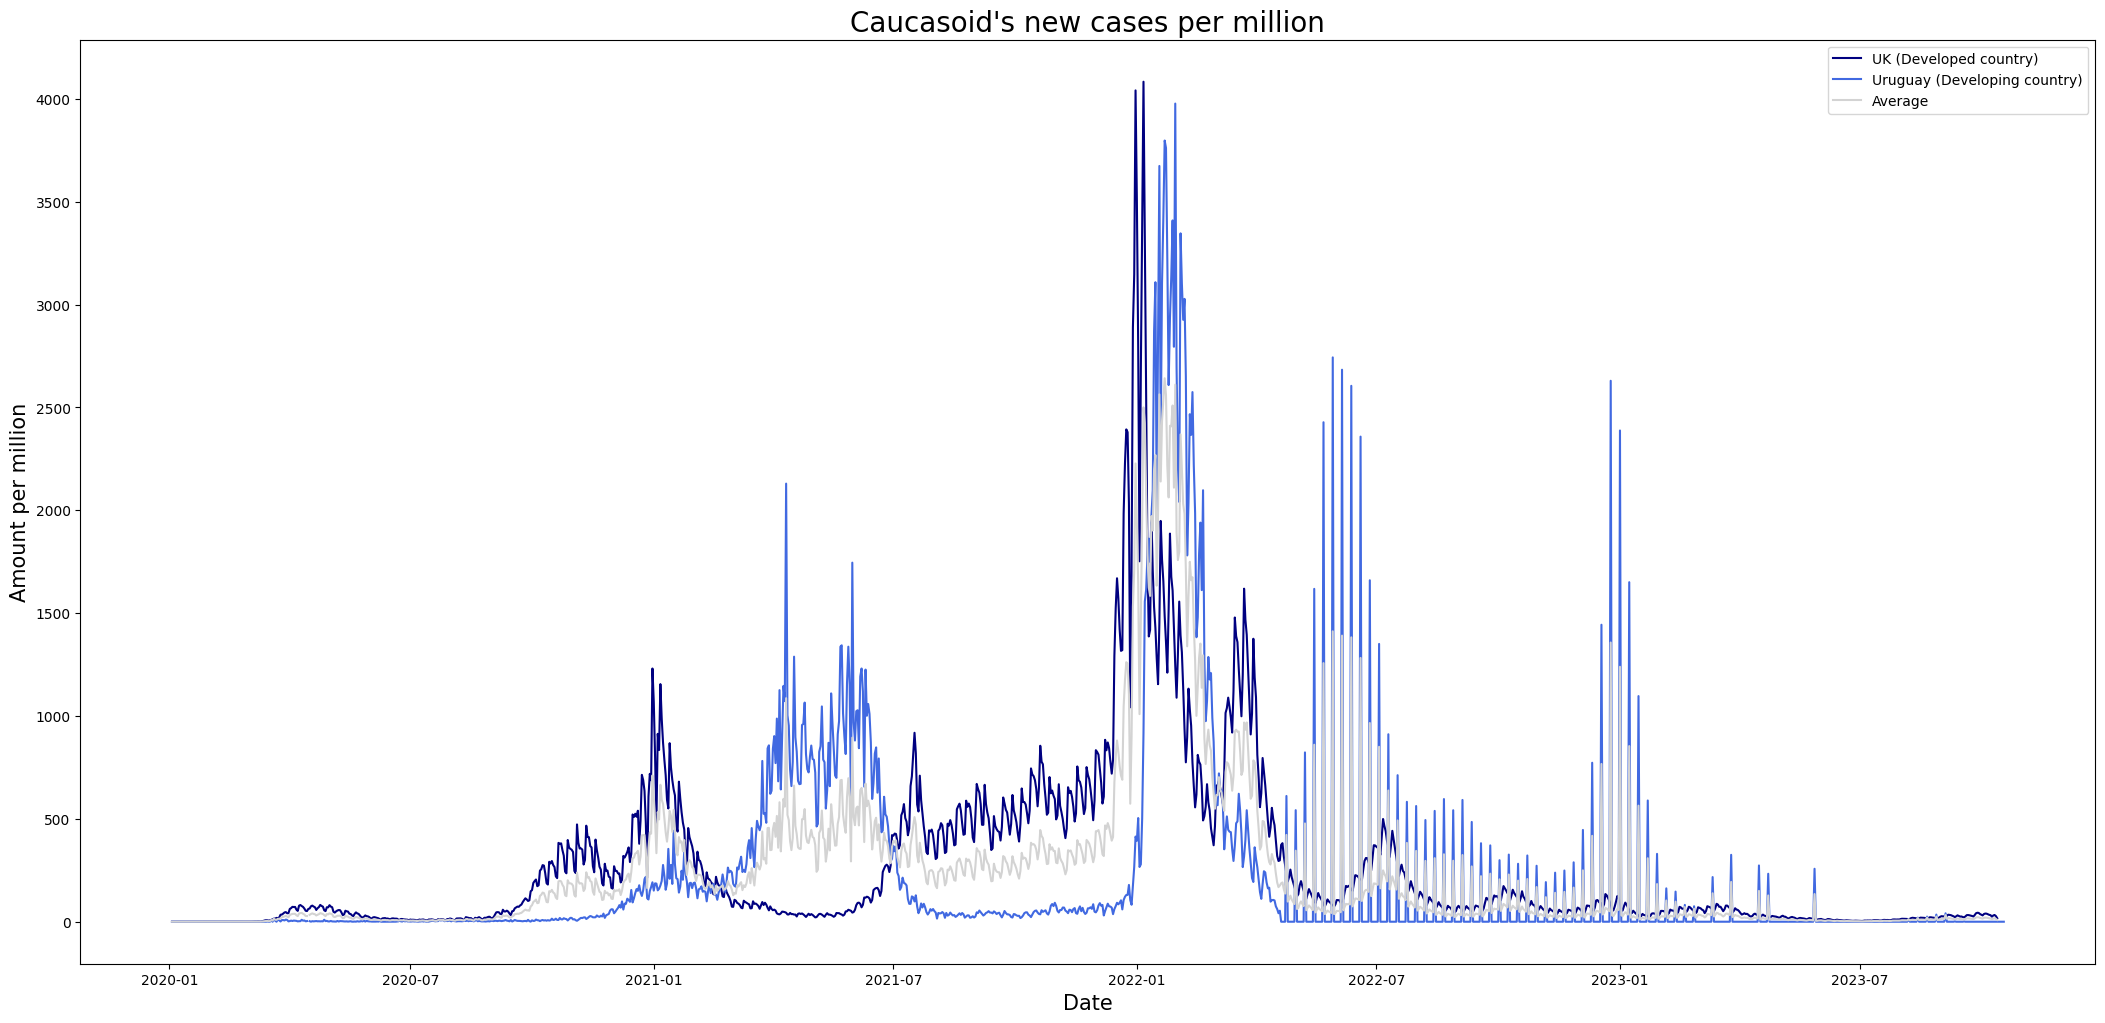

In [ ]:
## ! plotting Caucasoid's (White) graph ! ##

# ดึงข้อมูลสองประเทศ คือ UK และ Uruguay (พัฒนาแล้วและกำลังพัฒนา ตามลำดับ)

## UK #######################################################

uk1 = list_iso_code.index('GBR')                             #หาช่วงindexของประเทศด้วยการหาindexชื่อย่อประเทศนั้น ถึงประเทศถัดไป
uk2 = list_iso_code.index('USA')                             #หาช่วงindexของประเทศด้วยการหาindexชื่อย่อประเทศนั้น ถึงประเทศถัดไป
uk_cases_per_m = list_new_cases_per_m[uk1:uk2]
uk_date = list_date[uk1:uk2]

## URUGUAY ################################################

uru1 = list_iso_code.index('URY')                             #หาช่วงindexของประเทศด้วยการหาindexชื่อย่อประเทศนั้น ถึงประเทศถัดไป
uru2 = list_iso_code.index('UZB')                             #หาช่วงindexของประเทศด้วยการหาindexชื่อย่อประเทศนั้น ถึงประเทศถัดไป
uruguay_cases_per_m = list_new_cases_per_m[uru1:uru2]
uruguay_date = list_date[uru1:uru2]

########## AVG WHITE ################################################

avg_white = []
n = 0
if len(uk_cases_per_m) > len(uruguay_cases_per_m):
  n = len(uk_cases_per_m)
  day_white = uk_date
else:
  n = len(uruguay_cases_per_m)
  day_white = uruguay_date
for i in range(n):
  try:
    t = (uk_cases_per_m[i] + uruguay_cases_per_m[i]) / 2
    avg_white.append(t)
  except:
    avg_white.append(None)

## PLOTING WHITE #########################################

plt.figure(figsize=(26,12))

x_avg_white = day_white
y_avg_white = avg_white

x_uk = uk_date
y_uk = uk_cases_per_m
x_uruguay = uruguay_date
y_uruguay = uruguay_cases_per_m

plt.plot(x_uk,y_uk,color='navy',label='UK (Developed country)')
plt.plot(x_uruguay,y_uruguay,color='royalblue',label='Uruguay (Developing country)')

plt.plot(x_avg_white,y_avg_white,color='lightgrey',label='Average')

plt.title("Caucasoid's new cases per million",size='20')
plt.ylabel('Amount per million',size='15')
plt.xlabel('Date',size='15')
plt.legend(loc='best')
plt.show()


##############################################################


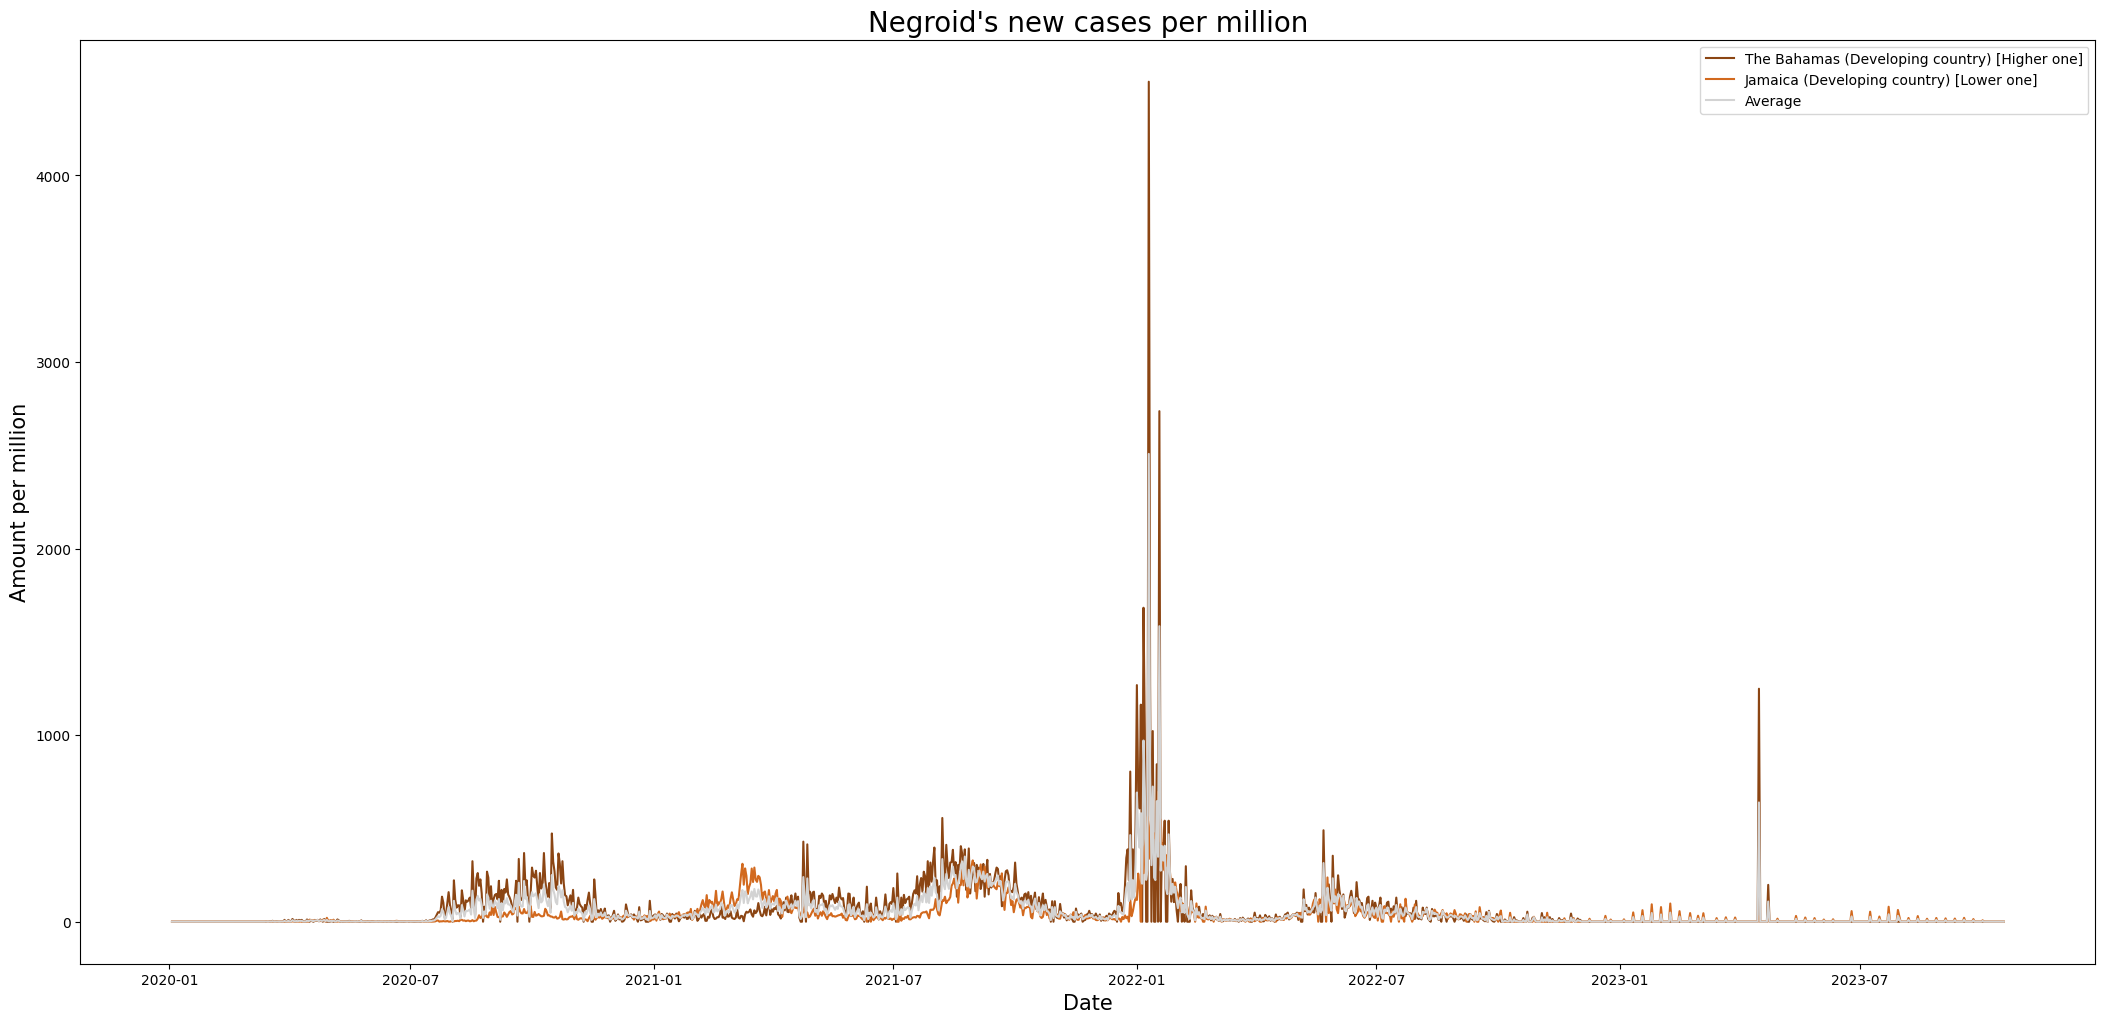

In [ ]:
## ! plotting Negroid's (Black) graph ! ##

# ดึงข้อมูลสองประเทศ คือ The Bahamas และ Jamaica !!!!(ในกลุ่มตัวอย่างนี้ใช้ประเทศที่กำลังพัฒนาทั้งคู่ แต่มีความแตกต่างทาง HDI (Human Development Index) ที่ห่างกันพอๆ กับคู่ประเทศอื่นที่กล่าวมาทั้งหมด)!!!!

## THE BAHAMAS #######################################################

bah1 = list_iso_code.index('BHS')                             #หาช่วงindexของประเทศด้วยการหาindexชื่อย่อประเทศนั้น ถึงประเทศถัดไป
bah2 = list_iso_code.index('BHR')                             #หาช่วงindexของประเทศด้วยการหาindexชื่อย่อประเทศนั้น ถึงประเทศถัดไป
bahamas_cases_per_m = list_new_cases_per_m[bah1:bah2]
bahamas_date = list_date[bah1:bah2]

## JAMAICA ################################################

jam1 = list_iso_code.index('JAM')                             #หาช่วงindexของประเทศด้วยการหาindexชื่อย่อประเทศนั้น ถึงประเทศถัดไป
jam2 = list_iso_code.index('JPN')                             #หาช่วงindexของประเทศด้วยการหาindexชื่อย่อประเทศนั้น ถึงประเทศถัดไป
jamaica_cases_per_m = list_new_cases_per_m[jam1:jam2]
jamaica_date = list_date[jam1:jam2]

########## AVG BLACK ################################################

avg_black = []
n = 0
if len(bahamas_cases_per_m) > len(jamaica_cases_per_m):
  n = len(bahamas_cases_per_m)
  day_black = bahamas_date
else:
  n = len(jamaica_cases_per_m)
  day_black = jamaica_date
for i in range(n):
  try:
    t = (bahamas_cases_per_m[i] + jamaica_cases_per_m[i]) / 2
    avg_black.append(t)
  except:
    avg_black.append(None)

## PLOTING BLACK #########################################

plt.figure(figsize=(26,12))

x_avg_black = day_black
y_avg_black = avg_black

x_bahamas = bahamas_date
y_bahamas = bahamas_cases_per_m
x_jamaica = jamaica_date
y_jamaica = jamaica_cases_per_m

plt.plot(x_bahamas,y_bahamas,color='saddlebrown',label='The Bahamas (Developing country) [Higher one]')
plt.plot(x_jamaica,y_jamaica,color='chocolate',label='Jamaica (Developing country) [Lower one]')

plt.plot(x_avg_black,y_avg_black,color='lightgrey',label='Average')

plt.title("Negroid's new cases per million",size='20')
plt.ylabel('Amount per million',size='15')
plt.xlabel('Date',size='15')
plt.legend(loc='best')
plt.show()



##############################################################


** จากกราฟด้านบนจะเห็นได้ว่าข้อมูลอาจขาดตกบกพร่อง เนื่องจากการส่งข้อมูลที่ไม่ต่อเนื่องของประเทศที่เป็นเผ่าพันธุ์ Negroid **

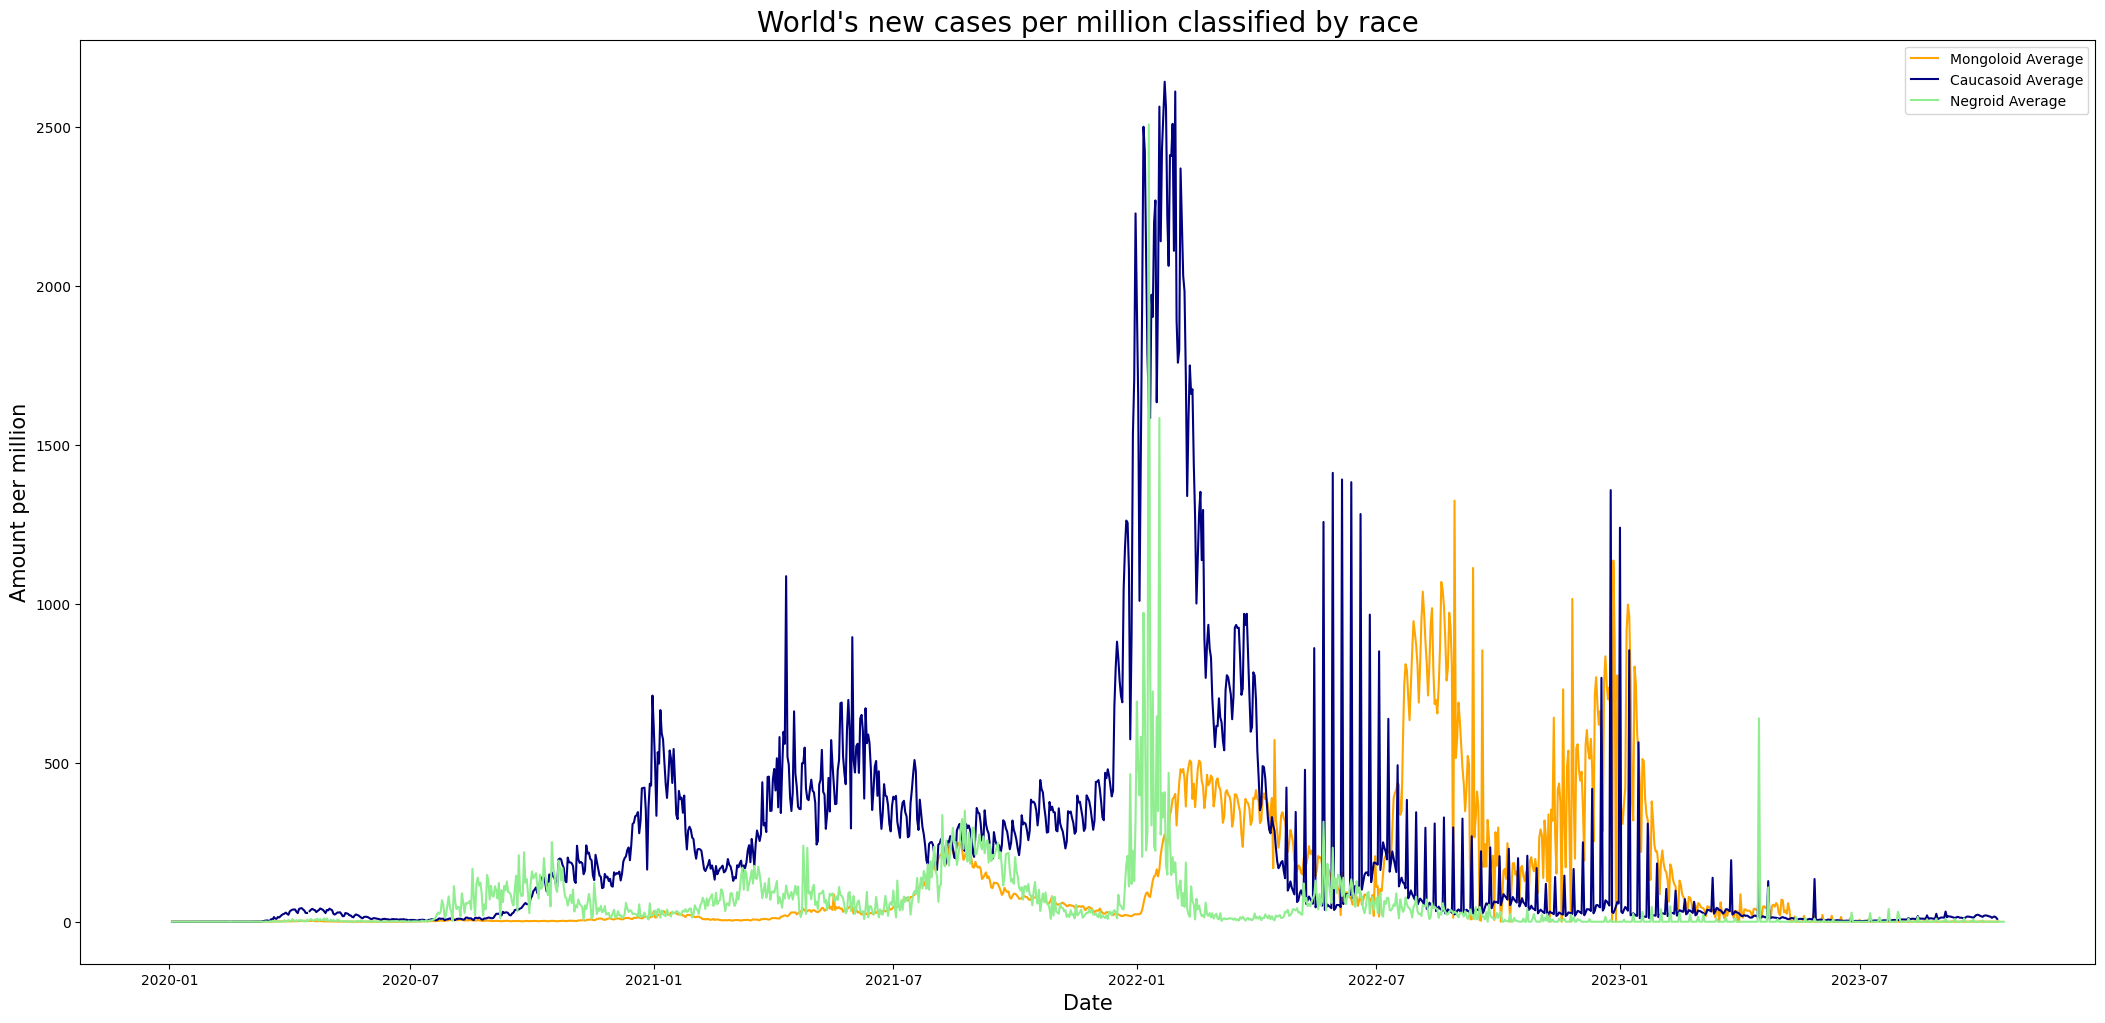

In [ ]:
######  นำกราฟที่เฉลี่ยแล้วของทั้ง 3 เผ่าพันธุ์มาเปรียบเทียบกัน  ################################################################

plt.figure(figsize=(26,12))

plt.plot(x_avg_asian,y_avg_asian,color='orange',label='Mongoloid Average')

plt.plot(x_avg_white,y_avg_white,color='navy',label='Caucasoid Average')

plt.plot(x_avg_black,y_avg_black,color='lightgreen',label='Negroid Average')

plt.title("World's new cases per million classified by race",size='20')
plt.ylabel('Amount per million',size='15')
plt.xlabel('Date',size='15')
plt.legend(loc='best')
plt.show()


##############################################################

จากกราฟจะเห็นได้ว่า เผ่าพันธุ์ของมนุษย์ อาจจะมีผลต่อการเกิด new cases ได้ โดยจะเห็นได้ว่า จำนวนการเกิด Caucasoid > Negroid > Mongoloid